In [135]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
#import shap

gpu_devices = tf.config.experimental.list_physical_devices('GPU')

if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')
    
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



Shutdown_Physiologic = pd.read_csv("Shutdown_Physiologic.csv").drop('Unnamed: 0', axis=1).set_index(['case_id','phenotype'])

from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

cat_encoder = OneHotEncoder(sparse=False)

pheno_type_cat = Shutdown_Physiologic[['pheno']]
pheno_type_cat_1hot = cat_encoder.fit_transform(pheno_type_cat)
Shutdown_Physiologic['pheno'] = pheno_type_cat_1hot

scaled_Shutdown_Physiologic = (Shutdown_Physiologic - Shutdown_Physiologic.mean()) / Shutdown_Physiologic.std()

y_ = Shutdown_Physiologic['pheno']
X_ = Shutdown_Physiologic.drop("pheno", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X_, y_, test_size=.3, stratify=y_)



Using CPU


In [136]:
scaled_Shutdown_Physiologic = (Shutdown_Physiologic - Shutdown_Physiologic.mean()) / Shutdown_Physiologic.std()


In [137]:
feats_list = []

In [138]:
# Feature selection using RFE
def recursive_feature_eng(model, X, Y, n_features):
    print("[INFO] Starting Recursive Feature Engineering")
    rfe = RFE(model, n_features_to_select=n_features)
    rfe_fit = rfe.fit(X,Y)
    print("Number of features chosen: %d" % rfe_fit.n_features_)
    print('Features selected from data are ', rfe_fit.get_feature_names_out())
  
    print("[INFO] Ending Recursive Feature Engineering")
    return rfe_fit

def intitalModel(X, y):
  from sklearn.metrics import confusion_matrix, classification_report

  for randomState in range(1,25):
      
      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=randomState)
      model = LogisticRegression()
      model.fit(X_train,y_train)
      
      train_score = model.score(X_train,y_train)
      test_score = model.score(X_test,y_test)
      
      pred = model.predict(X_test)
      cm = confusion_matrix(y_test, pred)
      cr = classification_report(y_test, pred)
      print("-"*90)
      print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
      print("-"*90)
      print("[CLASS_REPORT] printing classification report to console")
      print("-"*90)
      print("CLASS_REPORT: {} Seed: {}".format(cr, randomState))
      print("-"*90)
    
    
def evaluate(model, X_test, Y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy      

def confusion_matrix_eval(Y_truth, Y_pred):
    from sklearn.metrics import confusion_matrix, classification_report
    cm = confusion_matrix(Y_test, pred_class)
    cr = classification_report(Y_test, pred_class)
    print("-"*90)
    print("[CLASS_REPORT] printing classification report to console")
    print("-"*90)
    print(cr)
    print("-"*90)
    return [cm, cr]


In [139]:
mi = mutual_info_classif(X=X_,y=y_,random_state=42, discrete_features=False)    # Estimate mutual information for a discrete target variable. Which measures dependecy between variables  
dfinfo = pd.DataFrame(mi, index=X_.columns) # Creating dateframe from results
filterlabels = dfinfo[dfinfo[0] >= 0.12] # Filtering resulting dateframe
Mut_info  = X_[filterlabels.index]
Mut_infolist = list(Mut_info.columns)

feats_list.append(Mut_infolist)
display(
    Mut_infolist,
    intitalModel(Shutdown_Physiologic[Mut_infolist], y_)
)

------------------------------------------------------------------------------------------
Test Score: 0.5384615384615384 Training Score: 0.8974358974358975 Seed: 1
------------------------------------------------------------------------------------------
[CLASS_REPORT] printing classification report to console
------------------------------------------------------------------------------------------
CLASS_REPORT:               precision    recall  f1-score   support

         0.0       0.43      0.60      0.50         5
         1.0       0.67      0.50      0.57         8

    accuracy                           0.54        13
   macro avg       0.55      0.55      0.54        13
weighted avg       0.58      0.54      0.54        13
 Seed: 1
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Test Score: 0.6153846153846154 Training Score: 0.8461538461538461

['abQ_IGJ',
 'pQ1_APOC1',
 'pQ2_APOE',
 'pQ2_F2_a',
 'pQ3_CPB2',
 'pQ5_A2M',
 'pQ5_CFB',
 'pQ5_FABP1',
 'pQ6_C1R',
 'pQ6_LGALS3BP',
 'pQ6_SERPINA10',
 'pQ6_SERPINA5',
 'pQ7_C1QA',
 'pQ7_GSTA1',
 'pQ8_CPN1']

None

In [140]:
from xgboost import XGBClassifier

select = SelectFromModel(XGBClassifier(n_estimators=500, learning_rate=000.1, random_state=7), threshold=0.020)
select.fit(X_, y_)
X_selected = select.transform(X_)

XGB_fets = X_[select.get_feature_names_out()]

XGBlist = list(XGB_fets.columns)
feats_list.append(XGBlist)

display(
    XGBlist,
    intitalModel(Shutdown_Physiologic[XGBlist], y_)
)

------------------------------------------------------------------------------------------
Test Score: 1.0 Training Score: 0.7692307692307693 Seed: 1
------------------------------------------------------------------------------------------
[CLASS_REPORT] printing classification report to console
------------------------------------------------------------------------------------------
CLASS_REPORT:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13
 Seed: 1
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Test Score: 0.8461538461538461 Training Score: 0.8974358974358975 Seed: 2
------

['abQ_LV302',
 'pQ1_IGKC',
 'pQ1_SERPINC1',
 'pQ2_ITIH1',
 'pQ2_KLKB1',
 'pQ3_PROC_a',
 'pQ3_PROS1_a',
 'pQ3_VWF',
 'pQ5_FABP1',
 'pQ6_C1R',
 'pQ6_SERPINA5',
 'pQ7_ATRN',
 'pQ7_CST3',
 'pQ7_GSTA1',
 'pQ7_MPO',
 'pQ8_PAR2']

None

In [141]:
#pip install BorutaShap

In [142]:
from BorutaShap import BorutaShap


In [143]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=True)


In [144]:
Feature_Selector.fit(X=X_, y=y_, n_trials=100, sample=False,
            	     train_or_test = 'test', normalize=True,verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

6 attributes confirmed important: ['pQ7_PRG4', 'pQ8_PAR2', 'pQ7_ATRN', 'pQ2_SERPINF2_a', 'pQ6_SERPINA10', 'pQ7_CPB2']
185 attributes confirmed unimportant: ['pQ7_PARK7', 'pQ2_LRG1', 'pQ5_SERPING1', 'pQ6_SERPINA4', 'pQ3_CXCL7', 'pQ4_F3', 'pQ1_APOA1', 'pQ4_MMP2', 'pQ5_A2M', 'pQ1_FGA_b', 'pQ2_SERPINF2_b', 'pQ3_CPB2', 'abQ_IGHD', 'pQ3_PROC_b', 'pQ6_C1QB', 'pQ1_SERPINA3', 'pQ5_FABP1', 'pQ8_CPB2', 'pQ2_GSN', 'pQ1_ORM1', 'pQ5_C4BPA', 'pQ2_ITIH1', 'pQ3_S100A9', 'pQ5_B2M', 'abQ_IGLL5', 'pQ6_C8B', 'pQ5_SERPINF2', 'abQ_IGHM_b', 'pQ1_IGHG1.4', 'pQ6_CLEC3B', 'pQ7_GSTA1', 'pQ8_ITIH3', 'pQ3_F13B', 'pQ3_LBP', 'pQ1_IGKC', 'abQ_IGHM_a', 'pQ1_SERPINC1', 'pQ2_AFM', 'pQ2_CPN2', 'pQ2_ITIH2', 'pQ7_PRDX5', 'pQ1_ALB_1', 'abQ_IGHG1', 'pQ1_RBP4', 'pQ8_PLAT', 'pQ7_CXCL7', 'abQ_KV302', 'pQ4_F7', 'pQ3_VWF', 'pQ1_HPX', 'abQ_IGLC1', 'pQ8_KNG1', 'pQ6_C1R', 'pQ5_CFI', 'pQ7_SERPINA6', 'pQ3_CRP_a', 'pQ3_PROC_a', 'abQ_IGHA1', 'pQ4_MMP9', 'pQ3_PROS1_a', 'pQ5_TF', 'abQ_TF', 'pQ2_HBD', 'pQ5_SAA1_A2', 'pQ6_SERPINA7', 'cn_ly30

In [145]:
subset = Feature_Selector.Subset()

subsetlist = list(subset.columns)

feats_list.append(subsetlist)

display(
    subsetlist,
    intitalModel(subset, y_)
)

------------------------------------------------------------------------------------------
Test Score: 0.6923076923076923 Training Score: 0.8461538461538461 Seed: 1
------------------------------------------------------------------------------------------
[CLASS_REPORT] printing classification report to console
------------------------------------------------------------------------------------------
CLASS_REPORT:               precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.83      0.62      0.71         8

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13
 Seed: 1
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Test Score: 0.8461538461538461 Training Score: 0.8461538461538461

['pQ7_PRG4',
 'pQ8_PAR2',
 'pQ7_ATRN',
 'pQ2_SERPINF2_a',
 'pQ6_SERPINA10',
 'pQ7_CPB2']

None

In [146]:
from sklearn.feature_selection import RFE
modelForRFE = XGBClassifier(n_estimators=500, learning_rate=000.1, random_state=7)


#estimator contains the algorithm model object
# step defines how many features to be eliminated per iteration (Suggestion: Always select 1 feature per iteration (Backward Elimination algo))
# n_features_to_select defines how many features to select in first iteration. Default is 50% feature is selected if not specified.
selectFeaturesFromRFE = RFE(estimator= modelForRFE,n_features_to_select=7)

selectFeaturesFromRFE.fit(X_,y_)

feats_list.append(list(selectFeaturesFromRFE.get_feature_names_out()))



display(
    selectFeaturesFromRFE.get_feature_names_out(),

    intitalModel(X_[selectFeaturesFromRFE.get_feature_names_out()], y_)
)

------------------------------------------------------------------------------------------
Test Score: 0.9230769230769231 Training Score: 0.8974358974358975 Seed: 1
------------------------------------------------------------------------------------------
[CLASS_REPORT] printing classification report to console
------------------------------------------------------------------------------------------
CLASS_REPORT:               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.88      0.93         8

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.92        13
 Seed: 1
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Test Score: 0.7692307692307693 Training Score: 0.8974358974358975

array(['abQ_IGHG1', 'pQ1_SERPINC1', 'pQ2_KLKB1', 'pQ3_PROS1_a',
       'pQ6_SERPINA10', 'pQ6_SERPINA5', 'pQ8_PAR2'], dtype=object)

None

In [147]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import  f_classif

selectFeaturesFromANOVA=SelectPercentile(percentile=10,score_func= f_classif) #Percentile here denotes % features to keep

selectFeaturesFromANOVA.fit(X_,y_)

feats_list.append(list(selectFeaturesFromANOVA.get_feature_names_out()))


display(
    selectFeaturesFromANOVA.get_feature_names_out(),

    intitalModel(X_[selectFeaturesFromANOVA.get_feature_names_out()], y_)
)



------------------------------------------------------------------------------------------
Test Score: 0.9230769230769231 Training Score: 0.9230769230769231 Seed: 1
------------------------------------------------------------------------------------------
[CLASS_REPORT] printing classification report to console
------------------------------------------------------------------------------------------
CLASS_REPORT:               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.89      1.00      0.94         8

    accuracy                           0.92        13
   macro avg       0.94      0.90      0.92        13
weighted avg       0.93      0.92      0.92        13
 Seed: 1
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Test Score: 0.7692307692307693 Training Score: 0.9230769230769231

array(['abQ_ALB_ab', 'abQ_IGHG1', 'pQ1_SERPINC1', 'pQ2_APOE', 'pQ2_KLKB1',
       'pQ2_SERPINF2_a', 'pQ2_SERPINF2_b', 'pQ3_F11', 'pQ3_PROC_b',
       'pQ5_A1BG', 'pQ5_SERPINF2', 'pQ6_C8A', 'pQ6_C8B', 'pQ6_SERPINA10',
       'pQ6_SERPINA5', 'pQ7_ATRN', 'pQ7_MPO', 'pQ8_CPN1', 'pQ8_PAR2'],
      dtype=object)

None

In [148]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [149]:
# =============================================================================
# Train the model
# =============================================================================


model = XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.001, 
                      use_label_encoder=False, eval_metric='logloss').fit(X_train, Y_train)


In [150]:
import shap
# =============================================================================
# Make model predictions
# =============================================================================
# Make predictions with model
pred_class = model.predict(X_test)
pred_probs = model.predict_proba(X_test)

In [151]:


cm, cr = confusion_matrix_eval(Y_test, pred_class)

------------------------------------------------------------------------------------------
[CLASS_REPORT] printing classification report to console
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62         8
         1.0       0.62      0.62      0.62         8

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16

------------------------------------------------------------------------------------------


In [152]:
# =============================================================================
# Shapley Values for Feature Importance
# =============================================================================
# Fit relevant explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
# View shap values
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
shapselected = importance_df[importance_df['shap_importance'] != 0]


In [153]:
shapselected

,column_name,shap_importance
188,pQ8_PAR2,0.685854
156,pQ6_SERPINA5,0.376096
5,abQ_IGHG1,0.07739
182,pQ7_SERPINA6,0.032169
140,pQ5_SAA1_A2,0.020293
85,pQ2_SERPINF2_b,0.019971
64,pQ2_F12,0.010377


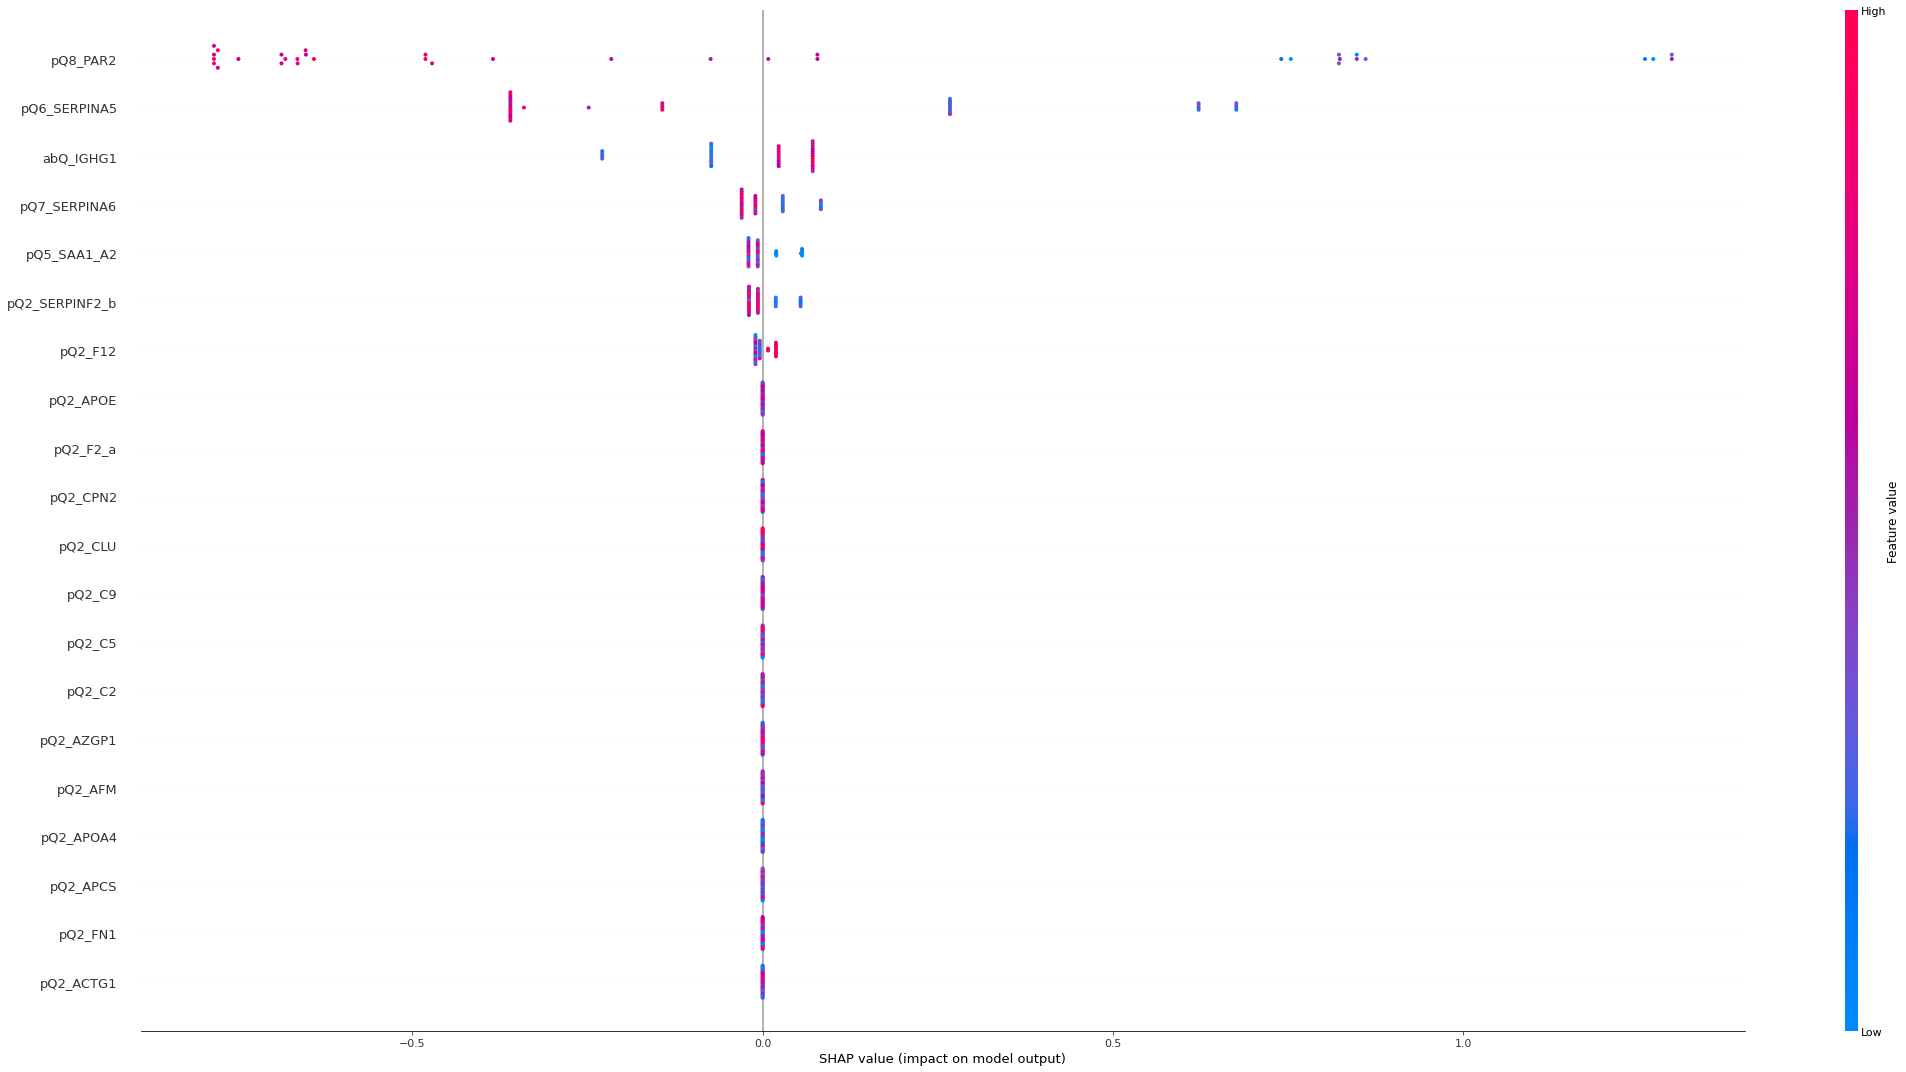

In [154]:
# =============================================================================
# # Get global variable importance plot
# =============================================================================
plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_train, # Use training set features
                             feature_names=X_train.columns, #Use column names
                             show=False, #Set to false to output to folder
                             plot_size=(30,15)) # Change plot size

# Save my figure to a directory


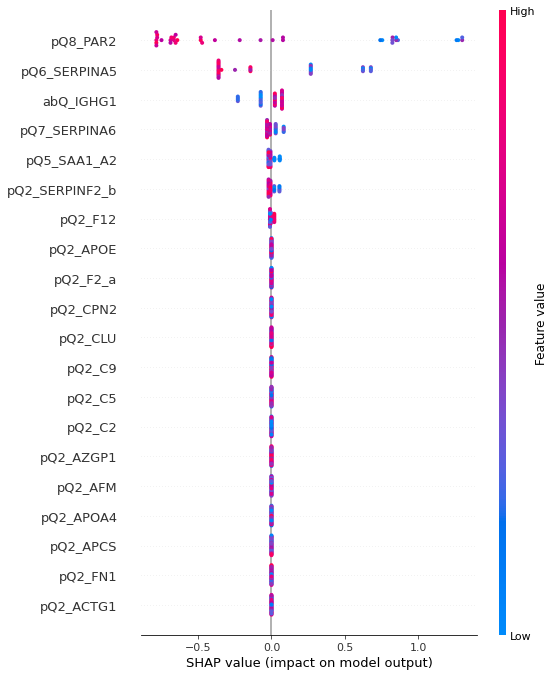

In [155]:
shap.summary_plot(shap_values, X_train)

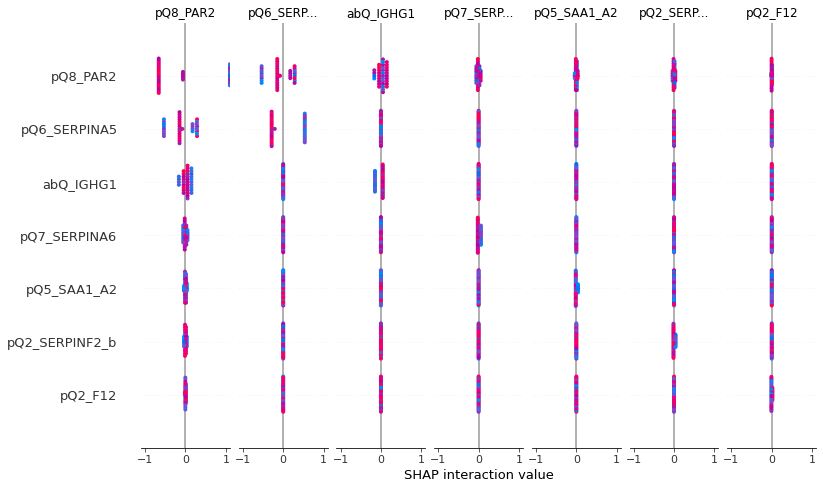

In [156]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train)


shap.summary_plot(shap_interaction_values, X_train)

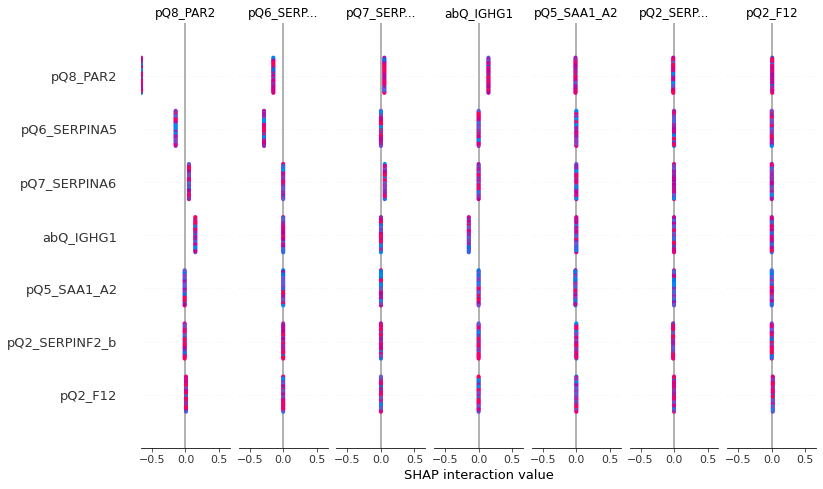

In [157]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(shap_values)


shap.summary_plot(shap_interaction_values, X_train)

In [158]:
import lightgbm as lgb


X_train, X_test, Y_train, Y_test = train_test_split(X_, y_, test_size=.3)

# create a train/test split
d_train = lgb.Dataset(X_train, label=Y_train)
d_test = lgb.Dataset(X_test, label=Y_test)


params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=200, verbose_eval=1000)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_)

Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.874894


In [159]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [161]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200,
                  231,
                  263,
                  294,
                  326,
                  357,
                  389,
                  421,
                  452,
                  484,
                  515,
                  547,
                  578,
                  610,
                  642,
                  673,
                  705,
                  736,
                  768,
                  800]}


In [162]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, Y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [163]:
rf_random.best_params_


{'n_estimators': 515,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [164]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test.values, Y_test)

Model Performance
Accuracy = 0.44%.


In [165]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Accuracy = 0.38%.


In [166]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of -14.29%.


In [167]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [168]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train);

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [169]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)

Model Performance
Accuracy = 0.25%.


In [170]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [171]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Improvement of -42.86%.


In [172]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6],
    'min_samples_split': [5],
    'n_estimators': [75, 100]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_final.fit(X_train, Y_train);

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [173]:
grid_search_final.best_params_


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 75}

In [174]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, X_test, Y_test)


Model Performance
Accuracy = 0.38%.


In [175]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

Improvement of -14.29%.


In [176]:
from sklearn.linear_model import LassoCV
from xgboost import XGBClassifier

Lasso = LassoCV()
xgb_clf = XGBClassifier()

learning_rate_param_range = [0.0001, 0.001, 0.01, 0.1]

n_estimators_param_range = [125, 150, 200, 250]

param_grid = [{'learning_rate': learning_rate_param_range, 
               'n_estimators': n_estimators_param_range
               }]
               
gs = GridSearchCV(estimator=xgb_clf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
print('Test accuracy: %.3f' % clf.score(X_test, Y_test))

0.6642857142857143
{'learning_rate': 0.01, 'n_estimators': 125}
Test accuracy: 0.562


In [177]:
feats_list

[['abQ_IGJ',
  'pQ1_APOC1',
  'pQ2_APOE',
  'pQ2_F2_a',
  'pQ3_CPB2',
  'pQ5_A2M',
  'pQ5_CFB',
  'pQ5_FABP1',
  'pQ6_C1R',
  'pQ6_LGALS3BP',
  'pQ6_SERPINA10',
  'pQ6_SERPINA5',
  'pQ7_C1QA',
  'pQ7_GSTA1',
  'pQ8_CPN1'],
 ['abQ_LV302',
  'pQ1_IGKC',
  'pQ1_SERPINC1',
  'pQ2_ITIH1',
  'pQ2_KLKB1',
  'pQ3_PROC_a',
  'pQ3_PROS1_a',
  'pQ3_VWF',
  'pQ5_FABP1',
  'pQ6_C1R',
  'pQ6_SERPINA5',
  'pQ7_ATRN',
  'pQ7_CST3',
  'pQ7_GSTA1',
  'pQ7_MPO',
  'pQ8_PAR2'],
 ['pQ7_PRG4',
  'pQ8_PAR2',
  'pQ7_ATRN',
  'pQ2_SERPINF2_a',
  'pQ6_SERPINA10',
  'pQ7_CPB2'],
 ['abQ_IGHG1',
  'pQ1_SERPINC1',
  'pQ2_KLKB1',
  'pQ3_PROS1_a',
  'pQ6_SERPINA10',
  'pQ6_SERPINA5',
  'pQ8_PAR2'],
 ['abQ_ALB_ab',
  'abQ_IGHG1',
  'pQ1_SERPINC1',
  'pQ2_APOE',
  'pQ2_KLKB1',
  'pQ2_SERPINF2_a',
  'pQ2_SERPINF2_b',
  'pQ3_F11',
  'pQ3_PROC_b',
  'pQ5_A1BG',
  'pQ5_SERPINF2',
  'pQ6_C8A',
  'pQ6_C8B',
  'pQ6_SERPINA10',
  'pQ6_SERPINA5',
  'pQ7_ATRN',
  'pQ7_MPO',
  'pQ8_CPN1',
  'pQ8_PAR2']]

In [179]:
from sklearn.model_selection import GridSearchCV

for i in feats_list:
    svm_clf = SVC(random_state=1)
    log_clf = LogisticRegression(random_state=42)
    rnd_clf = RandomForestClassifier(random_state=42)
    voting_clf = VotingClassifier(
        estimators=[('lr', log_clf), ('rf', rnd_clf),
                    ('svc', svm_clf)],
        voting='hard')

    # Define the hyperparameter grids for each classifier
    svm_param_grid = {
        'kernel': ['rbf'],
        'gamma': [0.001, 0.01, 0.1, 1],
        'C': [0.1, 1, 10, 100]
    }
    log_param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10, 100]
    }
    rnd_param_grid = {
        'n_estimators': [10, 100, 1000],
        'max_depth': [None, 10, 100]
    }

    for clf, param_grid in zip((svm_clf, log_clf, rnd_clf), 
                               (svm_param_grid, log_param_grid, rnd_param_grid)):
        # Initialize the GridSearchCV object
        grid_search = GridSearchCV(clf, param_grid, cv=5,
                                   scoring='accuracy', return_train_score=True)
        # Fit the grid search object to the training data
        grid_search.fit(X_[i], y_)
        # Print the best hyperparameters and the best score
        print(i)
        print(f"Best hyperparameters for {clf.__class__.__name__}: {grid_search.best_params_}")
        print(f"Best score for {clf.__class__.__name__}: {grid_search.best_score_:.3f}")

['abQ_IGJ', 'pQ1_APOC1', 'pQ2_APOE', 'pQ2_F2_a', 'pQ3_CPB2', 'pQ5_A2M', 'pQ5_CFB', 'pQ5_FABP1', 'pQ6_C1R', 'pQ6_LGALS3BP', 'pQ6_SERPINA10', 'pQ6_SERPINA5', 'pQ7_C1QA', 'pQ7_GSTA1', 'pQ8_CPN1']
Best hyperparameters for SVC: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best score for SVC: 0.715
['abQ_IGJ', 'pQ1_APOC1', 'pQ2_APOE', 'pQ2_F2_a', 'pQ3_CPB2', 'pQ5_A2M', 'pQ5_CFB', 'pQ5_FABP1', 'pQ6_C1R', 'pQ6_LGALS3BP', 'pQ6_SERPINA10', 'pQ6_SERPINA5', 'pQ7_C1QA', 'pQ7_GSTA1', 'pQ8_CPN1']
Best hyperparameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best score for LogisticRegression: 0.696
['abQ_IGJ', 'pQ1_APOC1', 'pQ2_APOE', 'pQ2_F2_a', 'pQ3_CPB2', 'pQ5_A2M', 'pQ5_CFB', 'pQ5_FABP1', 'pQ6_C1R', 'pQ6_LGALS3BP', 'pQ6_SERPINA10', 'pQ6_SERPINA5', 'pQ7_C1QA', 'pQ7_GSTA1', 'pQ8_CPN1']
Best hyperparameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 1000}
Best score for RandomForestClassifier: 0.733
['abQ_LV302', 'pQ1_IGKC', 'pQ1_SERPINC1', 'pQ2_ITIH1', 'pQ2_KLKB1', 'pQ